In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Load other libraries
import bcolz
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid

['test', 'train', 'labels.csv', 'sample_submission.csv']


Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('../input/labels.csv')
df_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


**Creating empty bcolz array:**

In [3]:
im_size = 300
x_train_raw = bcolz.zeros((0,im_size,im_size,3),np.float32)
y_train = []

**Loading image and appending to array:**

In [4]:
for i,j in tqdm(df_train.values):
    image = load_img('../input/train/{}.jpg'.format(i), target_size=(im_size, im_size))
    x_train_raw.append(img_to_array(image))
    y_train.append(j)

100%|██████████| 10222/10222 [01:23<00:00, 122.51it/s]


**Image Summary:**

Number of images:  10222 
 Array shape:  (10222, 300, 300, 3)


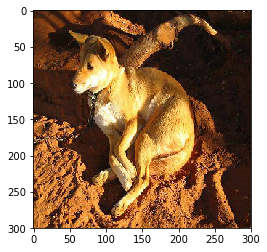

In [5]:
print("Number of images: ",len(y_train),"\n",
      "Array shape: ",x_train_raw.shape)
plt.imshow(x_train_raw[1]/255)

**Defining image augmentation function:**

In [10]:
def img_augmentation(x_train_raw, y_train):
    n = x_train_raw.shape[0]
    rand = random.sample(range(0,n),2)
    img_container = np.zeros((2,int(x_train_raw.shape[1]*0.8),int(x_train_raw.shape[2]*0.8),3),dtype=np.float32)
    data_generator = ImageDataGenerator()
#     plt.ion()
    for i in range(0,len(rand)):
    # Crop Image
        if random.randint(1,101)<20:
            # Top Left
            img_container[i]=x_train_raw[rand[i],0:240,0:240,:]
        elif random.randint(1,101)<40:
            # Top Right
            img_container[i]=x_train_raw[rand[i],0:240,60:300,:]
        elif random.randint(1,101)<60:
            # Bottom Left
            img_container[i]=x_train_raw[rand[i],60:300,0:240,:]
        elif random.randint(1,101)<60:
            # Bottom Right
            img_container[i]=x_train_raw[rand[i],60:300,60:300,:]
        else:
            # Center
            img_container[i]=x_train_raw[rand[i],30:270,30:270,:]
        # Flip Image
        if random.randint(1,101) < 50: 
            flip_horizontal = True
        else:
            flip_horizontal = False
        if random.randint(1,101) < 50: 
            flip_vertical = True
        else:
            flip_vertical = False
        img_container[i] = data_generator.apply_transform(img_container[i],{
            'flip_horizontal':flip_horizontal,
            'flip_vertical':flip_vertical
        })
        print("Original Image:")
        plt.title(y_train[rand[i]])
        plt.imshow(x_train_raw[rand[i],]/255.0)
        plt.show()    
    def plotImages(images_arr, n_images=2):
        fig, axes = plt.subplots(n_images-1, n_images, figsize=(12,12))
        axes = axes.flatten()
        for img, ax in zip( images_arr, axes):
            ax.imshow(img)
            ax.set_xticks(())
            ax.set_yticks(())
            plt.tight_layout()
    plotImages(img_container[:,]/255.)
    

Original Image:


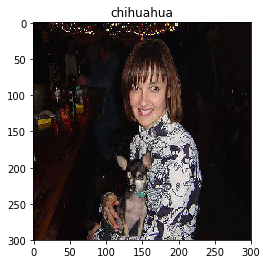

Original Image:


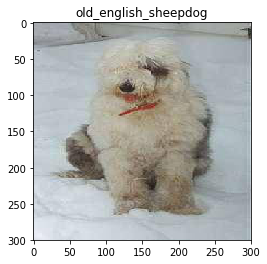

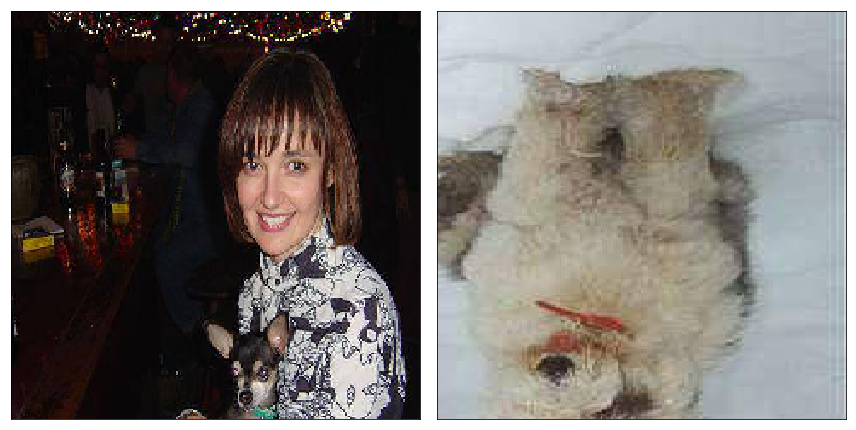

In [11]:
img_augmentation(x_train_raw, y_train)